In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\a\Downloads\EmployeeSampleData (1)\Employee Sample Data.xlsx")

PROBLEM STATEMENT:(independent t test)

“Is there a statistically significant difference in the mean annual salary between male and female employees in the organization?”

In [3]:
# null hypothesis  H0: there is no significance differnece between the annual salary of male and female employees

# Alternate hypothesis h1: there is significance difference difference between the annual salary of male and female emoployees

In [4]:
# removing outliners [Annual salary]

# Calculate IQR

q1 = df['Annual Salary'].quantile(0.25)
q3 = df['Annual Salary'].quantile(0.75)
IQR  = q3-q1

# calculate bounds

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 +1 * IQR

# remove outliners
df = df[(df['Annual Salary']>=lower_bound) & (df['Annual Salary']<= upper_bound)]




In [5]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [72]:
male_salary = [55000, 60000, 58000, 62000, 59000]    
female_salary = [53000, 57000, 56000, 54000, 55000]   


In [75]:
# perform independent t test (welch's t- test)

t_stat,p_value = stats.ttest_ind(male_salary,female_salary,equal_var = False)

In [76]:
# display test results 

print('\n T-Test Results')
print("T-Statistics:",t_stat)
print("P- Value:",p_value)


 T-Test Results
T-Statistics: 2.8013971669430457
P- Value: 0.028041482241805218


<Figure size 1000x600 with 0 Axes>

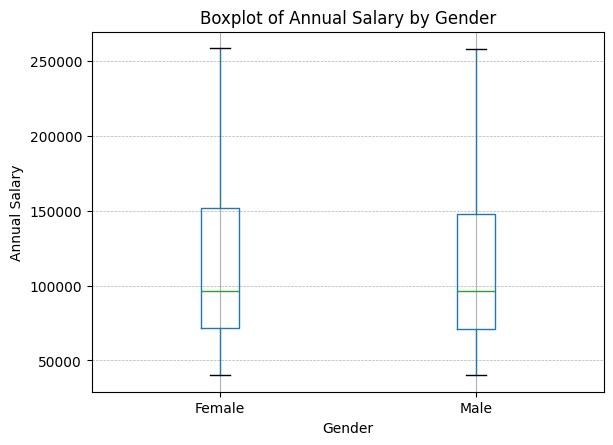

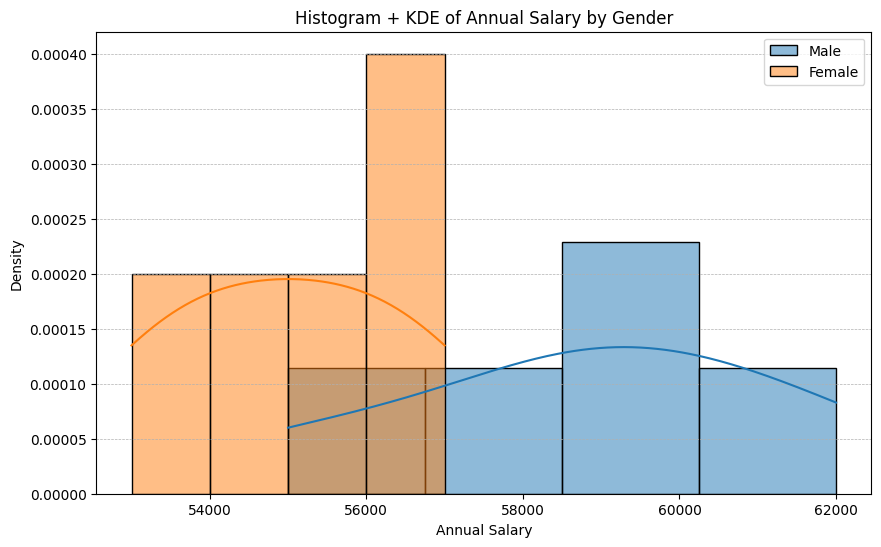

In [77]:
# Boxplot :annual salary by gender

plt.figure(figsize=(10, 6))
df.boxplot(column='Annual Salary', by='Gender')
plt.title('Boxplot of Annual Salary by Gender')
plt.suptitle('')  # Removes default title
plt.ylabel('Annual Salary')
plt.xlabel('Gender')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

import seaborn as sns
plt.figure(figsize=(10, 6))

sns.histplot(male_salary, kde=True, label='Male', stat='density')
sns.histplot(female_salary, kde=True, label='Female', stat='density')

plt.title('Histogram + KDE of Annual Salary by Gender')
plt.xlabel('Annual Salary')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [78]:
# Interpretation based on p-value
alpha = 0.05

print("\nConclusion\n")


if p_value < alpha:
    print("Reject the Null hypothesis.")
    print("There is a statistically significant difference in salary between male and female employees")

else:

    if p_value > alpha:
        print("Fail to reject null hypothesis")
        print("There is no statistically significant difference in salary between male and female employees")


Conclusion

Reject the Null hypothesis.
There is a statistically significant difference in salary between male and female employees


Chi-Square Test of Independence 

PROBLEM STATEMENT 

Is there a significant association between an employee’s Department and their Gender in the organization?

Organizations often aim to ensure equal gender representation across departments. We will test whether gender distribution is independent of department assignment or if certain departments are dominated by a particular gender.

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

In [13]:
# load the dataset 
df = pd.read_excel(r"C:\Users\a\Downloads\EmployeeSampleData (1)\Employee Sample Data.xlsx")

In [14]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [15]:
# contingency table

contingency_dep_gen = pd.crosstab(df['Department'],df['Gender'])

In [16]:
# chi square test

chi2_dep_gender,p_dep_gender,dof_dep_gender,expected_dep_gender = chi2_contingency(contingency_dep_gen)

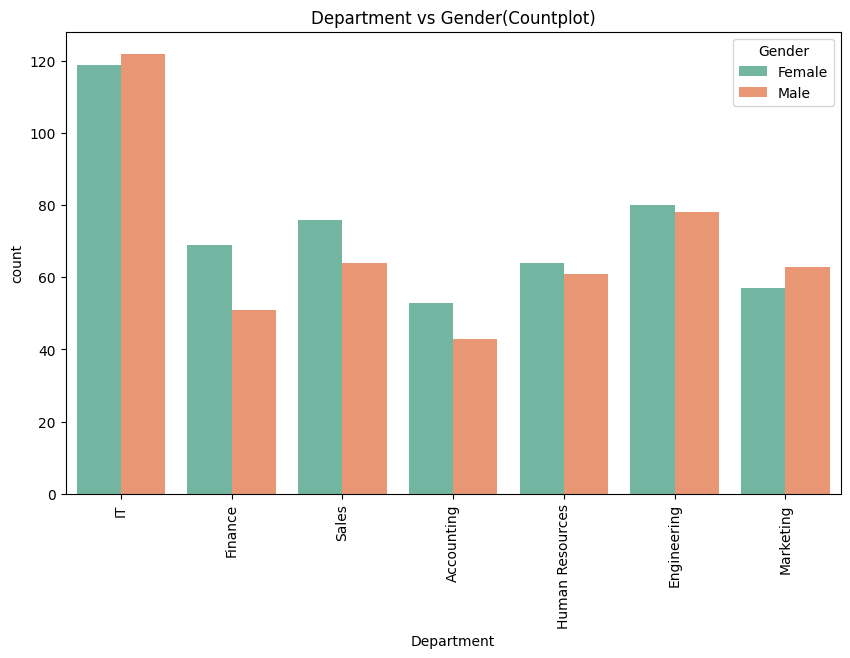

In [17]:
# countplot 

plt.figure(figsize = (10,6))
sns.countplot(data = df,x='Department',hue = 'Gender',palette = "Set2")
plt.title("Department vs Gender(Countplot)")
plt.ylabel('count')
plt.xticks(rotation = 90)    
plt.show()

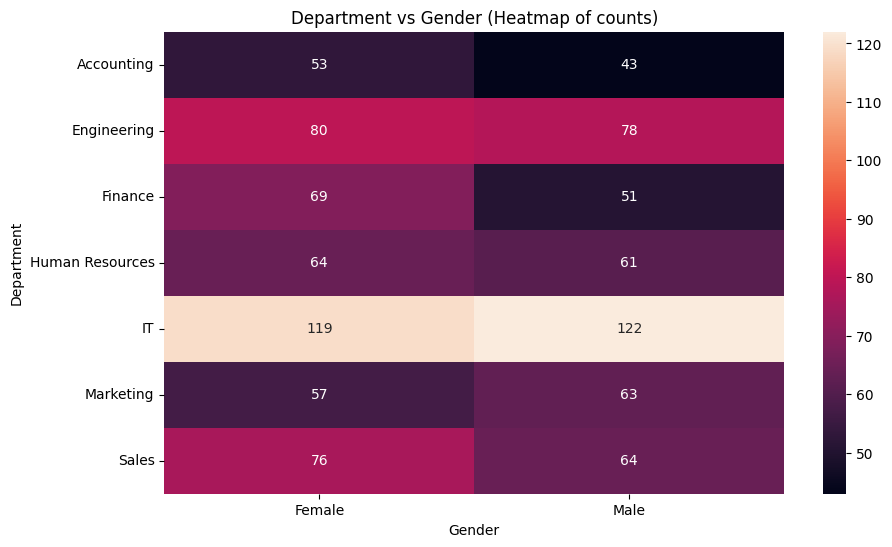

In [18]:
# heatmap of observed frequencies 

plt.figure(figsize = (10,6))
sns.heatmap(contingency_dep_gen,annot = True,fmt = 'd')
plt.title("Department vs Gender (Heatmap of counts)")
plt.show()

In [19]:
# print Results

print("Contingency table:\n",contingency_dep_gen)
print("\nchi_square_statistics\n:",chi2_dep_gender)
print("Degree of Freedom\n",dof_dep_gender)
print("P_Value",p_dep_gender)

Contingency table:
 Gender           Female  Male
Department                   
Accounting           53    43
Engineering          80    78
Finance              69    51
Human Resources      64    61
IT                  119   122
Marketing            57    63
Sales                76    64

chi_square_statistics
: 3.913971456281886
Degree of Freedom
 6
P_Value 0.6883172990752362


In [20]:
# Interpretation

alpha = 0.05

if p_value < alpha:
    print("\nconclusion: Reject the null hypothesis")
    print("there is a significant association between department and gender")

else:
    print("\n Conclusion :Fail to reject the null hypothesis")
    print("There is no significant association between the department and gender")


 Conclusion :Fail to reject the null hypothesis
There is no significant association between the department and gender


Problem Statement (ANOVA Test on Annual Salary vs Department)

The management of the company wants to determine whether employees across different departments are compensated equally or if there are significant salary differences between departments. Understanding this is crucial for maintaining pay equity and ensuring fair compensation practices.

"Is there a statistically significant difference in the mean annual salary among employees across different departments?"

In [21]:
# Null Hypothesis(H0): the mean annual salary is same across all departments.
# Alternate Hypotheis(H1): At least one department has a mean annual salary significantly different from the others.

In [22]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

In [23]:
# load the dataset

df = pd.read_excel(r"C:\Users\a\Downloads\EmployeeSampleData (1)\Employee Sample Data.xlsx")

In [24]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [25]:
# Group salary data by department

groups = df.groupby('Department')['Annual Salary'].apply(list)

In [26]:
# perform one way anova 

f_stats,p_value = stats.f_oneway(*groups)

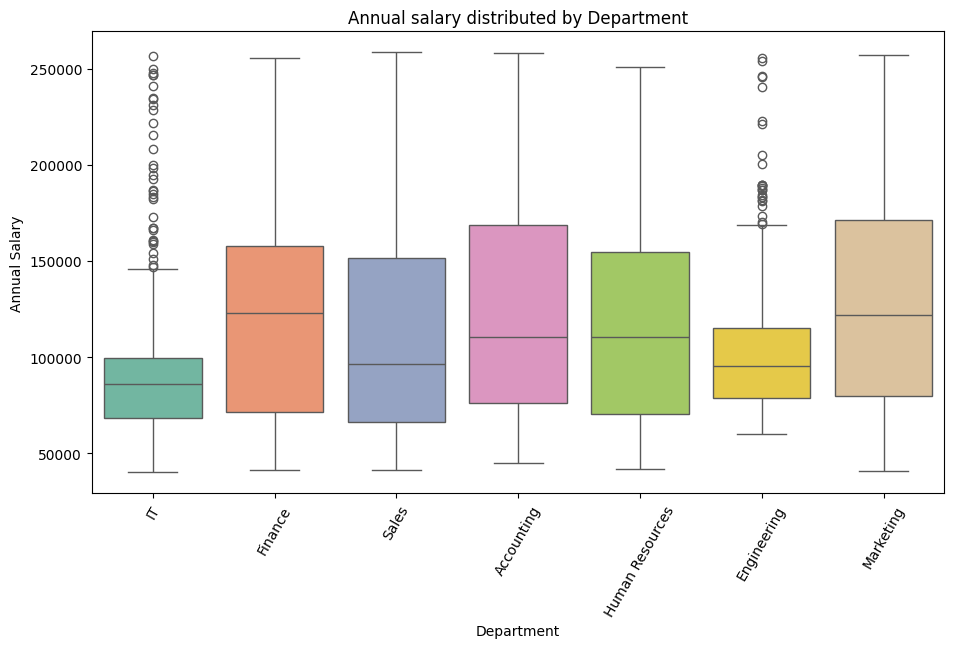

In [27]:
#visualizing to see groups difference

plt.figure(figsize = (11,6))
sns.boxplot(data = df,x = 'Department',y = 'Annual Salary',palette = 'Set2')
plt.title("Annual salary distributed by Department")
plt.xticks(rotation = 60)
plt.show()

In [28]:
print("\nAnova Tets Results:")
print("f_statsistics:",f_stats)
print("p_value:",p_value)


Anova Tets Results:
f_statsistics: 7.026361383103516
p_value: 2.447425692655359e-07


In [29]:
# interpretation

alpha = 0.05

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant difference in mean annual salary across departments.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in mean annual salary across departments.")



Conclusion: Reject the null hypothesis.
There is a significant difference in mean annual salary across departments.


Problem Statement: Two-Way ANOVA on Salary, Department, and Ethnicity

An organization wants to analyze whether employee compensation is influenced by internal demographic and organizational factors. Specifically, management is interested in understanding how Department and Ethnicity impact the Annual Salary of employees. Additionally, they want to know if there is an interaction effect between department and ethnicity — meaning whether the difference in salaries across departments is consistent across different ethnic groups or if certain ethnic groups experience varying salary trends in specific departments.

 The objective of this analysis is to answer the following questions:

1. Does the average annual salary significantly differ across departments?

2. Does the average annual salary significantly differ across ethnic groups?

3. Is there a combined interaction effect between department and ethnicity on annual salary?

In [30]:
# MAIN EFFECT DEPARTMENT:
# Null Hypothesis(h0):the mean annual salary is the same across all departments.
# Alternate Hypothesis(h1):at least one department has a significant difference mean annual salary

# MAIN EFFECT ETHNICITY:
# Null Hypothesis(h0): the mean annual salary is the same across all ethnic groups.
# Alternate Hypothesis(h1): at least one ethnic group has a significant different annual salary

# INTERACTION EFFECT : DEPARTMENT * ETHNICITY
# Null Hypothesis(h0): there is no interaction effect between department and ethnicity on annual salary.
# Alternate Hypothesis(h1): there is a significant interaction effect between department and ethnicity on annual salary.



In [31]:
# IMPORTINIG LIBRARIES 

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns 
import matplotlib.pyplot as plt

In [32]:
# LOAD THE DATASET

df = pd.read_excel(r"C:\Users\a\Downloads\EmployeeSampleData (1)\Employee Sample Data.xlsx")

In [33]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [34]:
# RUN TWO WAY ANOVA

model = ols('Q("Annual Salary") ~ C(Department) + C(Ethnicity) + C(Department):C(Ethnicity)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)


In [35]:
print('\n TWO WAY ANOVA RESULTS')
print(anova_table)


 TWO WAY ANOVA RESULTS
                                  sum_sq     df         F        PR(>F)
C(Department)               1.130118e+11    6.0  6.807983  4.363668e-07
C(Ethnicity)                1.029409e+10    3.0  1.240261  2.938585e-01
C(Department):C(Ethnicity)  4.817716e+10   18.0  0.967419  4.957163e-01
Residual                    2.689182e+12  972.0       NaN           NaN


In [36]:
# extract p_values 

p_dept = anova_table['PR(>F)']['C(Department)']
p_eth = anova_table['PR(>F)']['C(Ethnicity)']
p_interaction = anova_table['PR(>F)']['C(Department):C(Ethnicity)']

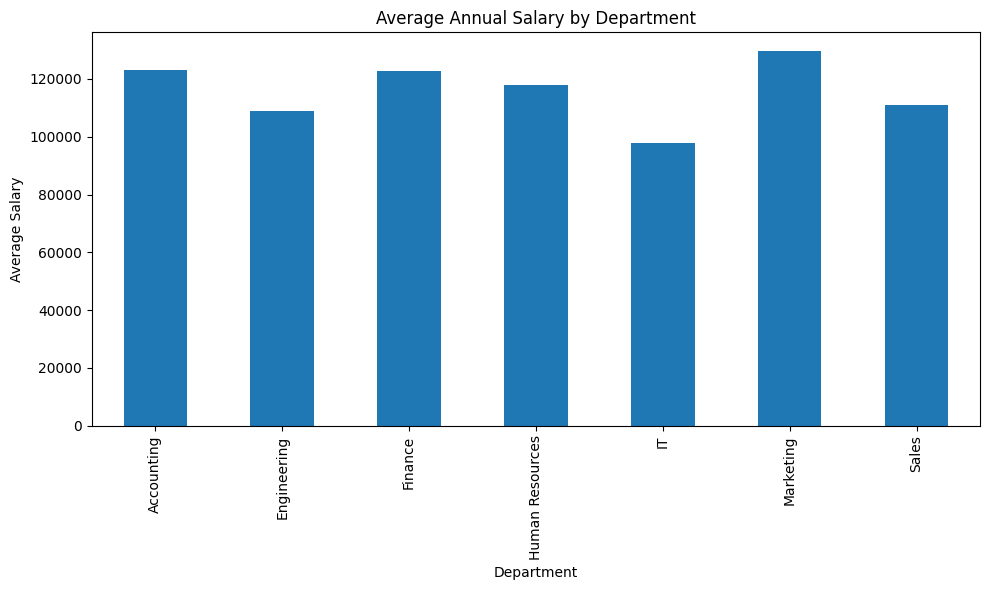

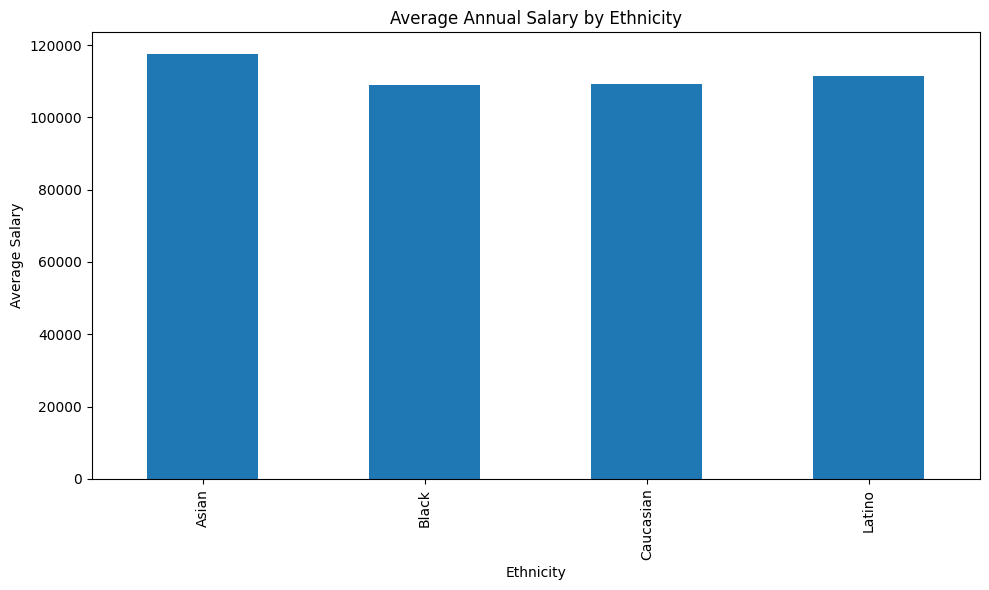

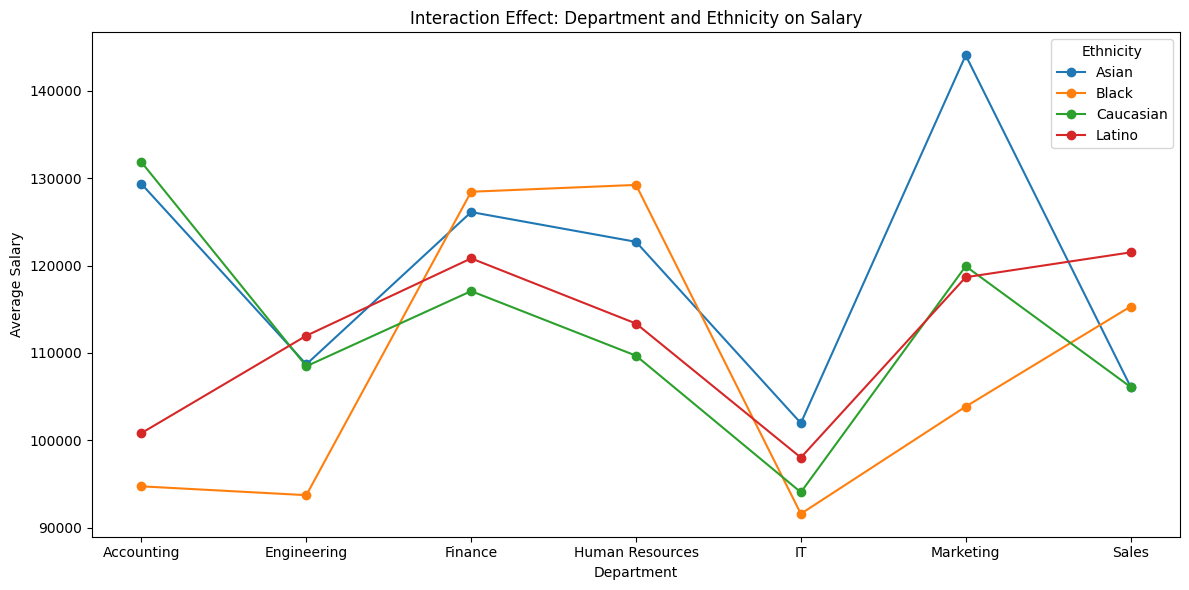

In [37]:
# VISUALISATIONS 

# 1. Average Salary by Department
dept_mean = df.groupby('Department')['Annual Salary'].mean()
plt.figure(figsize=(10,6))
dept_mean.plot(kind='bar')
plt.title('Average Annual Salary by Department')
plt.ylabel('Average Salary')
plt.xlabel('Department')
plt.tight_layout()
plt.show()

# 2. Average Salary by Ethnicity
eth_mean = df.groupby('Ethnicity')['Annual Salary'].mean()
plt.figure(figsize=(10,6))
eth_mean.plot(kind='bar')
plt.title('Average Annual Salary by Ethnicity')
plt.ylabel('Average Salary')
plt.xlabel('Ethnicity')
plt.tight_layout()
plt.show()


# 3. Interaction Plot: Department vs Ethnicity
interaction_mean = df.groupby(['Department', 'Ethnicity'])['Annual Salary'].mean().unstack()
plt.figure(figsize=(12,6))
for ethnicity in interaction_mean.columns:
    plt.plot(interaction_mean.index, interaction_mean[ethnicity], marker='o', label=ethnicity)

plt.title('Interaction Effect: Department and Ethnicity on Salary')
plt.ylabel('Average Salary')
plt.xlabel('Department')
plt.legend(title='Ethnicity')
plt.tight_layout()
plt.show()


In [38]:
# INTERPRETATION 

alpha = 0.05

# Question num 1: Department effect 

if p_dept < alpha:
    print("\n Department effect is significant")
    print("conclusion: Average annual salary significantly differs across department")

else:
    print("\n Department effect is not significant")
    print("Conclusion: no significant difference in salary across departments")

# question num 2 

if p_eth < alpha:
    print("\n Ethnicity effect is significant/n")
    print("Conclusion: average annual salary significantly differs across ethnnic groups")

else:
    print("\n Ethnicity effect is not significant\n")
    print("Conclusion: no significant differnece in salary across ethnic groups")

# question num 3 

if p_interaction < alpha:
    print(" interaction effect is  significant/n")
    print("Conclusion: there is a combined interaction effect between department and ethnicity on annual salary")

else:
    print("\n interactiion effect is not significant\n")
    print("Conclusion: no interaction effect -- the effect of department on salary does not depend on ethnicity")
    


 Department effect is significant
conclusion: Average annual salary significantly differs across department

 Ethnicity effect is not significant

Conclusion: no significant differnece in salary across ethnic groups

 interactiion effect is not significant

Conclusion: no interaction effect -- the effect of department on salary does not depend on ethnicity


Problem Statement (one sample Z-Test on Employee Age)
Objective:

To determine whether the average age of employees in the company is significantly different from the population workforce average age of 40 years.

In [39]:
# Hypothesis Testing

# Null Hypothesis: the menan age of employee in the company is equal to 44 years.
# Alternate Hypothesis: The mean age of employees in the company is not equal to 44 years.

In [40]:
# IMPORTING LIBRARIES

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

In [41]:
df = pd.read_excel(r"C:\Users\a\Downloads\EmployeeSampleData (1)\Employee Sample Data.xlsx")

In [42]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [43]:
df['Age'].mean()

44.382

In [44]:
# extract the age column

age_data = df['Age'].dropna()

In [45]:
# population mean (hypothesized mean)

population_mean = df['Age'].mean()

In [46]:
# one sample z test 

z_test,p_value = ztest(age_data,value = population_mean)

In [47]:
print("Z Statsistics",z_test)
print("p_value",p_value)

Z Statsistics 0.0
p_value 1.0


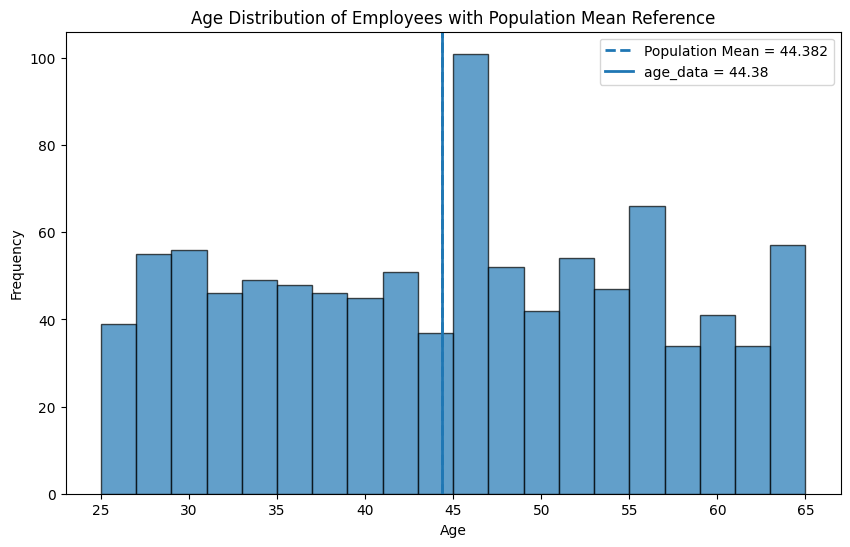

In [48]:
# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, alpha=0.7, edgecolor='black')

# Add vertical line for hypothesized mean
plt.axvline(population_mean, linewidth=2, linestyle='--', label=f'Population Mean = {population_mean}')

# Add another line for sample mean (optional for insight)
age_data = np.mean(age_data)
plt.axvline(age_data, linewidth=2, linestyle='-', label=f'age_data = {age_data:.2f}')

# Title and labels
plt.title('Age Distribution of Employees with Population Mean Reference')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [49]:
# interpretation

alpha = 0.05

if p_value < alpha:
    print("Conclusion: Reject the null Hypothesis\n")
    print("there is statistically significance evidence that the average age differs from population mean (44 years)")

else:
    print("Conclusion: fail to reject the null hypothesis")
    print("there is no signoificantly evidence that the average age differs from population mean (44 years)")
    

Conclusion: fail to reject the null hypothesis
there is no signoificantly evidence that the average age differs from population mean (44 years)


Problem statement (one-sided two-sample Z-test)

Question: Is the mean annual salary in the IT department greater than the mean annual salary in the Finance department?

In [50]:
# Hypothesis testing

# Null Hypothesis(HO) : There is no evidence that employees in the IT department earn more than those in the Finance department. The average salary in IT is less than or equal to Finance.

# Alternate Hypothesis(H1): The average salary in the IT department is greater than the average salary in the Finance department.

In [51]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from statsmodels.stats.weightstats import ztest

In [52]:
# Load dataset 

df = pd.read_excel(r"C:\Users\a\Downloads\EmployeeSampleData (1)\Employee Sample Data.xlsx")

In [53]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [54]:
# extract annual salary of both departments(IT ,Finance)

IT_group = df[df['Department'] == 'IT']['Annual Salary'].dropna()

Finance_group = df[df['Department'] == 'Finance']['Annual Salary'].dropna()

In [55]:
# extracting mean of both departments (IT , Finance)

IT = df[df['Department'] == 'IT']['Annual Salary'].mean()

Finance = df[df['Department'] == 'Finance']['Annual Salary'].mean()

In [56]:
 # labels for visualizations

IT_1 =  'IT'

Finance_1 = 'Finance'

In [57]:
# perform two sample z test

z_stat,p_value = ztest(IT_group,Finance_group)

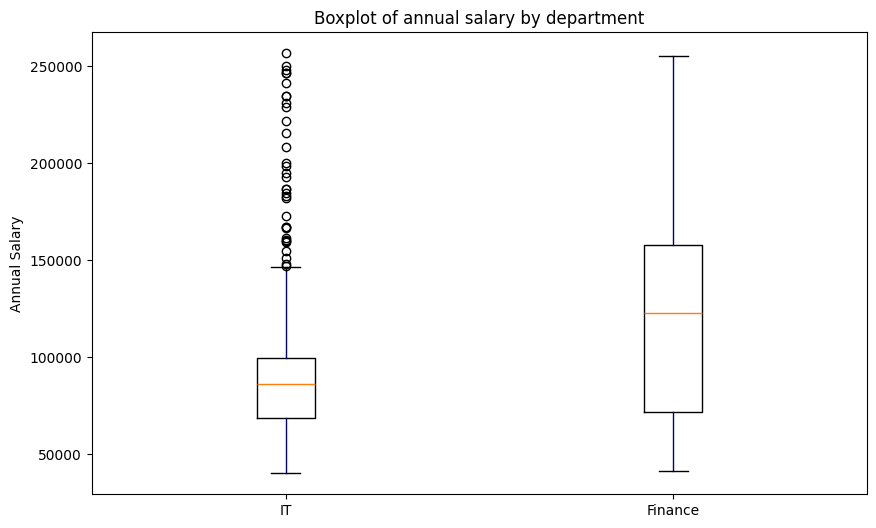

In [58]:
# Visualization 1 : side by side boxplot

plt.figure(figsize =(10,6))
plt.boxplot([IT_group,Finance_group],labels=[IT_1,Finance_1], whiskerprops=dict(color='navy'),)
plt.title("Boxplot of annual salary by department")
plt.ylabel("Annual Salary")
plt.show()


In [61]:
print("z_stat",z_stat)
print("p_value",p_value)
print("IT",IT)
print("Finance",Finance)

z_stat -4.423693667648958
p_value 9.702757274123818e-06
IT 97790.45228215768
Finance 122802.89166666666


In [62]:
# Interpretaion

alpha = 0.05

if p_value < alpha:
    print("Conclusion: Reject (H0) The average salary in the IT department is greater than the average salary in the Finance department.")

else:
    print("Conclusion: Fail to reject (Ho) There is no evidence that employees in the IT department earn more than those in the Finance department.")

Conclusion: Reject (H0) The average salary in the IT department is greater than the average salary in the Finance department.


In [63]:
df

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,NaT
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,NaT
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,2012-01-28,95960,0.00,China,Chengdu,NaT


Problem Statement (one sample z test for proportions)

"Is the proportion of male employees in this company greater than 50% ?"

In [64]:
# Hypothesis testing

# Null Hypothesis: (HO): p =0.50 (the proportions of male is 50%)

# Alternate Hypothesis(H1): p > 0.50 (the proportions of male is greater than 50%)

In [65]:
# Importing libraries 

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest


In [66]:
male_gender = (df["Gender"] == 'Male').sum()

n_total = len(df)

In [67]:
# hypothesised proportion
p0 = 0.50

In [68]:
# perform one sample z test for proportions 

z_test,p_value = proportions_ztest(male_gender,n_total,value = p0)

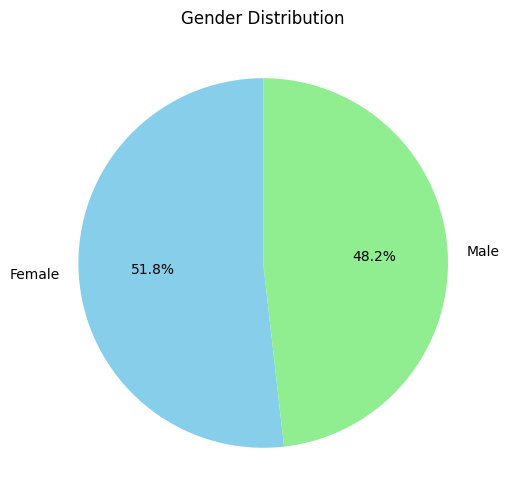

In [69]:
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

In [70]:
print("total_num_of_male:",male_gender)
print("Total_num_of_gender:",n_total)
print("sample_proportions(p^):",male_gender/n_total)
print("Z_statsistics:",z_test)
print("P_value:",p_value)

total_num_of_male: 482
Total_num_of_gender: 1000
sample_proportions(p^): 0.482
Z_statsistics: -1.1391583716091056
P_value: 0.25463710484800917


In [71]:
# Interpretation 

alpha = 0.05

if p_value < alpha:
    print("Conclusion: Reject(H0) the proportion of male is greater than 50% ( p > 0.50)" )

else:
    print("Conclusion: Fail to reject (H0) the proportion of male is 0.50% ( p = 0.50 )" )

Conclusion: Fail to reject (H0) the proportion of male is 0.50% ( p = 0.50 )
